In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

 



In [20]:
data= pd.read_csv('Stock_Price_Prediction.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [22]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [24]:
data['profit'] = data['Close'].astype('float') - data['Open'].astype('float')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,profit
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,-7.740005
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,18.020004
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-2.019989
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-16.979981
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-4.380005


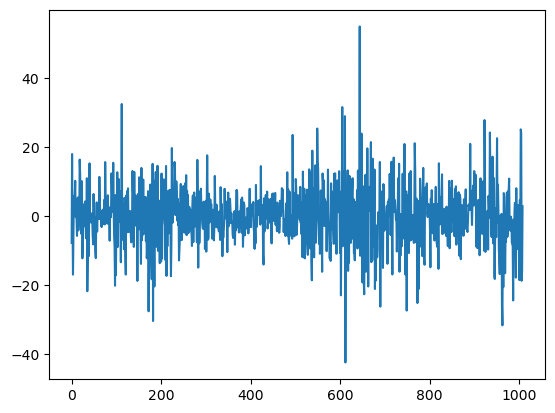

In [25]:
plt.plot(data.profit)

In [27]:
data['Avgdlyprice'] = (data['High'].astype('float') + data['Low'].astype('float'))/2
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,profit,Avgdlyprice
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,-7.740005,258.964996
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,18.020004,255.850006
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-2.019989,268.390000
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-16.979981,258.809998
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-4.380005,245.955002


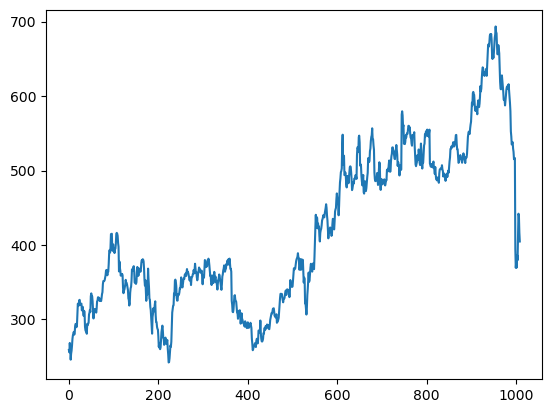

In [28]:
plt.plot(data.Avgdlyprice)

In [32]:
data['Date'] = pd.to_datetime(data['Date'])

data.groupby(data['Date'].dt.strftime('%Y-%m')).sum().reset_index()

C:\Users\Pooja\AppData\Local\Temp\ipykernel_20936\3591814590.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Date,Open,High,Low,Close,Adj Close,Volume,profit,Avgdlyprice
0,2018-02,4617.179993,4715.080002,4530.079988,4624.929979,4624.929979,165793200,7.749986,4622.579995
1,2018-03,6566.970032,6665.909973,6413.339997,6556.790038,6556.790038,263449400,-10.179994,6539.624985
2,2018-04,6491.720001,6589.970063,6342.499939,6456.790038,6456.790038,262006000,-34.929963,6466.235001
3,2018-05,7255.149902,7347.320067,7193.999999,7293.810028,7293.810028,142050800,38.660126,7270.660033
4,2018-06,8075.700013,8185.599976,7940.969972,8066.800050,8066.800050,244031800,-8.899963,8063.284974
5,2018-07,8000.360044,8130.759980,7858.899934,8011.820007,8011.820007,305393800,11.459963,7994.829957
6,2018-08,7944.430023,8076.719970,7839.440002,7963.929961,7963.929961,213122300,19.499938,7958.079986
7,2018-09,6903.210020,7014.829987,6777.489959,6890.189941,6890.189941,170832100,-13.020079,6896.159973
8,2018-10,7820.580017,7969.959960,7552.289918,7715.250002,7715.250002,363589800,-105.330015,7761.124939
9,2018-11,6103.510040,6246.669952,5930.189988,6097.240050,6097.240050,257126400,-6.269990,6088.429970


In [33]:
data['Date'] = pd.to_datetime(data['Date'])

data.groupby(data['Date'].dt.strftime('%Y')).sum().reset_index()

C:\Users\Pooja\AppData\Local\Temp\ipykernel_20936\2187779569.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Date,Open,High,Low,Close,Adj Close,Volume,profit,Avgdlyprice
0,2018,74838.690092,76145.899915,73291.839697,74718.300064,74718.300064,2621705600,-120.390028,74718.869806
1,2019,82816.540173,83915.670038,81672.689906,82875.839777,82875.839777,1980147700,59.299604,82794.179972
2,2020,112873.789859,114942.969932,110907.340429,113047.289916,113047.289916,1754276900,173.500057,112925.155181
3,2021,140751.129795,142412.619530,138995.080139,140670.859718,140670.859718,986466000,-80.270077,140703.849834
4,2022,11551.059999,11731.429993,11218.460025,11459.450042,11459.450042,296225000,-91.609957,11474.945009


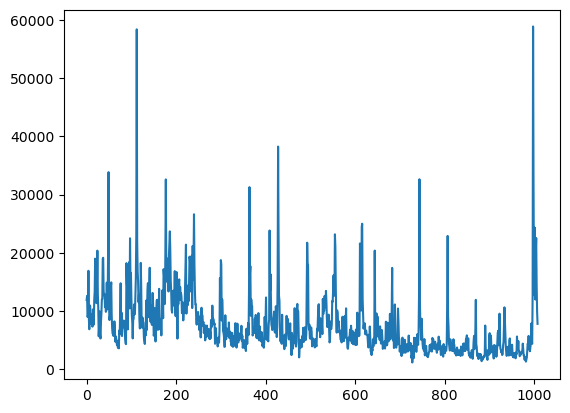

In [34]:
plt.plot(data.Volume/1000)

In [36]:
layout = go.Layout(
    title='Stock Prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data_grp = [{'x' : data['Date'], 'y':data['Close']}]
plot = go.Figure(data=data_grp,layout=layout)
    

In [37]:
iplot(plot)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [40]:
X = np.array(data.index).reshape(-1,1)
Y = data['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [41]:
scaler = StandardScaler().fit(X_train)

In [42]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [45]:
trace0 = go.Scatter(
    x= X_train.T[0],
    y= Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x= X_train.T[0],
    y=lm.predict(X_train).T,
    mode= 'lines',
    name = 'Predicted'
)
data_grp=[trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=data_grp,layout=layout)

In [46]:
iplot(plot2)

In [47]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6992669032944175	0.7261648669848495
MSE       3403.003880002517	3460.9885809580633

